In [1]:
import networkx
from ipywidgets import HTML
import ipyleaflet as ipl
import osmnx as ox
ox.config(use_cache=True, log_console=True)
from time import sleep
import pandas as pd

/private/tmp/route_visualizations/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/_r/l_8sp0rj1n11c1kmsxmnzppr0000gn/T/ipykernel_84535/3183428442.py:5: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [2]:
################################################################
## UNCOMMENT WHEN YOU WANT TO LOAD THE GRAPH DATA AND SAVE IT ##
################################################################

# graph = ox.graph_from_place('Amsterdam, the Netherlands')
# ox.io.save_graphml(graph, filepath='amsterdam.graphml', gephi=False, encoding='utf-8')

url = 'tramstops.csv'
source_df = pd.read_csv(url, delimiter=';')

##########
## TEST ##
##########

source_df.head()

,Volgorde,Naam,Modaliteit,Lijn,Lijn_select,RADIUS,Label,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Unnamed: 11
0,1,Dijkgraafplein,Tram,17 | 27,17|27,5,17 | 27 - Dijkgraafplein,POINT(4.786911 52.355548),POINT(52.355548 4.786911),4.786911,52.355548,NaN
1,2,Baden Powellweg,Tram,17 | 27,17|27,5,17 | 27 - Baden Powellweg,POINT(4.791584 52.356492),POINT(52.356492 4.791584),4.791584,52.356492,NaN
2,3,Hoekenes,Tram,17 | 27,17|27,5,17 | 27 - Hoekenes,POINT(4.799095 52.358004),POINT(52.358004 4.799095),4.799095,52.358004,NaN
3,4,Osdorpplein West,Tram,17 | 27,17|27,5,17 | 27 - Osdorpplein West,POINT(4.803203 52.359418),POINT(52.359418 4.803203),4.803203,52.359418,NaN
4,5,Osdorpplein Oost,Tram,17 | 27,17|27,5,17 | 27 - Osdorpplein Oost,POINT(4.807557 52.359622),POINT(52.359622 4.807557),4.807557,52.359622,NaN


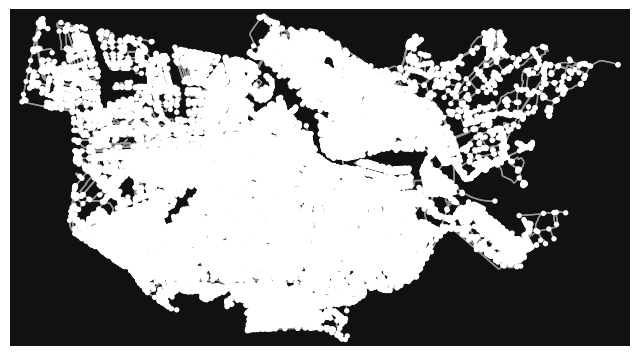

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
url = 'amsterdam.graphml'
graph = ox.io.load_graphml(url)
ox.plot_graph(graph)

In [4]:
stops = [
    {
        "lat": 52.355548 ,
        "long": 4.786911,
        "speed km_h": 2,
    },
    {
        "lat": 52.356492,
        "long": 4.791584,
        "speed km_h":10,
    },
    {
        "lat": 52.358004,
        "long": 4.799095,
        "speed km_h": 30,
    }
]




In [5]:
# Function combining data from source, street network into dictionary
def create_dict(source_df, graph, base_location):
    # Initialize
    selection = ['Lijn', 'Label', 'LAT', 'LNG']
    source_data = source_df[selection]
    location_dic = {}
    start = base_location
    gdf_nodes = ox.graph_to_gdfs(graph)[0]
    
    
    # For every location in the route create an entry with a location_id, a start location and a path list from start to location
    for lx, stop in source_data.iterrows():
        Lijn, Label, LAT, LNG = list(stop)
        location_dic[lx] = {'lijn': Lijn,
                            'label': Label,
                            'start': start,
                            'location': [LAT, LNG]
                            }
        y1, x1 = start
        y2, x2 = location_dic[lx]['location']
        nodes = ox.nearest_nodes(G=graph, X=[x1, x2], Y=[y1, y2])
        
        print(lx, nodes[0], nodes[1])
        path_nodes = networkx.shortest_path(graph, nodes[0], nodes[1])
        print("PATH NODES:", len(path_nodes))
        
        for n in path_nodes:
            print(n)
        path_coord = gdf_nodes.loc[path_nodes][['x', 'y']]
        print(len(path_coord))
        #print(path_coord)
        path = []
        for point in path_coord.values:
            path.append([point[1], point[0]])
            location_dic[lx]['path'] = path
    
        # Set new start location
        start = location_dic[lx]['location']
            
    return(location_dic)
            

##########
## TEST ##
##########
location_dict = create_dict(
    source_df=source_df, graph=graph, base_location=[52.355548, 4.786911])
location_dict[1]

0 8540718163 8540718163
PATH NODES: 1
8540718163
1
1 8540718163 10744253786
PATH NODES: 14
8540718163
46315573
10694076458
46316984
46317645
46318642
6376341423
839998626
46319327
1726034530
839998750
1998459918
2020302394
10744253786
14
2 10744253786 10661819334
PATH NODES: 16
10744253786
2020302394
1998459918
1971498462
1971498418
46322100
46322640
1351410871
10661819327
10661819326
10661819328
10661819325
6272038343
10661819330
6435713870
10661819334
16
3 10661819334 10694029399
PATH NODES: 20
10661819334
6435713870
10661819330
1575280736
1655708889
1732413292
1655708954
1992119714
11127500436
662371161
1977672332
11132287265
10058722913
1977672329
9765255421
10056860192
10056860197
2821836698
2821836806
10694029399
20
4 10694029399 1584781466
PATH NODES: 11
10694029399
10694029400
2821836808
2821836805
9762676341
10694029403
11132931760
11132931790
10009748955
10009748952
1584781466
11
5 1584781466 9998649654
PATH NODES: 16
1584781466
2020302406
10012283087
9480490776
10012283065
2

{'lijn': '17 | 27',
 'label': '17 | 27 - Baden Powellweg',
 'start': [52.355548, 4.786911],
 'location': [52.356492, 4.791584],
 'path': [[52.3555836, 4.7869354],
  [52.3555119, 4.7869719],
  [52.3557523, 4.7881929],
  [52.355775, 4.7883579],
  [52.3559298, 4.7891362],
  [52.3561473, 4.7902384],
  [52.3562551, 4.7907514],
  [52.3562766, 4.7908649],
  [52.3562971, 4.790982],
  [52.3563211, 4.7910997],
  [52.3563561, 4.7912591],
  [52.3563689, 4.7913182],
  [52.3564013, 4.7913007],
  [52.3564241, 4.7914128]]}

In [6]:
# Calculate map center and set bounds
latitudes = pd.Series(dtype="float64")
longitudes = pd.Series(dtype="float64")
for point in location_dict.values():
    lat, lon = pd.Series([point["location"][0]]), pd.Series(
        [point["location"][1]])
    latitudes = pd.concat([latitudes, lat])
    longitudes = pd.concat([longitudes, lon])
ce = [latitudes.mean(), longitudes.mean()]
sw = [latitudes.min(), longitudes.min()]
ne = [latitudes.max(), longitudes.max()]
m1 = ipl.Map(center=ce)
m1.fit_bounds([sw, ne])
m1.layout.height = '800px'
m1

Map(center=[52.358662666849824, 4.828480210794203], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [7]:
# Build route layer
trace = []
for point in location_dict.values():
    for path in point["path"]:
        trace.append(path)
lines = ipl.Polyline(
    locations=trace,
    color="tomato",
    fill=False
)
m1.add_layer(lines)

# Build stops locations layer
base = list(location_dict.values())[0]
start = ipl.Circle(
    location=base["start"],
    radius=30,
    color="DimGray",
    fill_color="Skyblue",
    fill=True,
    fill_opacity=1
)
m1.add_layer(start)

for stop in location_dict.values():
    circle = ipl.Circle(
        location=stop["location"],
        radius=20,
        color="DimGray",
        fill_color="SkyBlue",
        fill=True,
        fill_opacity=0.85,
        popup=HTML(str(stop["label"]))
    )
    m1.add_layer(circle)
    
# Add marker
mark = ipl.Marker(location=base["start"])
m1.add_layer(mark)

In [8]:
print(location_dict)

{0: {'lijn': '17 | 27', 'label': '17 | 27 - Dijkgraafplein', 'start': [52.355548, 4.786911], 'location': [52.355548, 4.786911], 'path': [[52.3555836, 4.7869354]]}, 1: {'lijn': '17 | 27', 'label': '17 | 27 - Baden Powellweg', 'start': [52.355548, 4.786911], 'location': [52.356492, 4.791584], 'path': [[52.3555836, 4.7869354], [52.3555119, 4.7869719], [52.3557523, 4.7881929], [52.355775, 4.7883579], [52.3559298, 4.7891362], [52.3561473, 4.7902384], [52.3562551, 4.7907514], [52.3562766, 4.7908649], [52.3562971, 4.790982], [52.3563211, 4.7910997], [52.3563561, 4.7912591], [52.3563689, 4.7913182], [52.3564013, 4.7913007], [52.3564241, 4.7914128]]}, 2: {'lijn': '17 | 27', 'label': '17 | 27 - Hoekenes', 'start': [52.356492, 4.791584], 'location': [52.358004, 4.799095], 'path': [[52.3564241, 4.7914128], [52.3564013, 4.7913007], [52.3563689, 4.7913182], [52.3566417, 4.7926613], [52.35691, 4.7940056], [52.3569441, 4.7941719], [52.3570731, 4.7940934], [52.3571086, 4.7940729], [52.3571317, 4.794059

In [9]:
step = 0.1

for stage in location_dict.values():
    for point in stage["path"]:
        mark.location = point
        print(point)
        sleep(step)
    visited = ipl.Circle(
        location=stage["location"],
        radius=20,
        color="#00b521",
        fill_color="#7fff96",
        fill=True,
        fill_opacity=0.85
    )
    m1.add_layer(visited)

[52.3555836, 4.7869354]
[52.3555836, 4.7869354]
[52.3555119, 4.7869719]
[52.3557523, 4.7881929]
[52.355775, 4.7883579]
[52.3559298, 4.7891362]
[52.3561473, 4.7902384]
[52.3562551, 4.7907514]
[52.3562766, 4.7908649]
[52.3562971, 4.790982]
[52.3563211, 4.7910997]
[52.3563561, 4.7912591]
[52.3563689, 4.7913182]
[52.3564013, 4.7913007]
[52.3564241, 4.7914128]
[52.3564241, 4.7914128]
[52.3564013, 4.7913007]
[52.3563689, 4.7913182]
[52.3566417, 4.7926613]
[52.35691, 4.7940056]
[52.3569441, 4.7941719]
[52.3570731, 4.7940934]
[52.3571086, 4.7940729]
[52.3571317, 4.7940593]
[52.3574152, 4.7954731]
[52.3576851, 4.7968191]
[52.3577195, 4.7969905]
[52.358004, 4.7982823]
[52.3580172, 4.798379]
[52.3580298, 4.7983843]
[52.3580696, 4.7985683]
[52.3580696, 4.7985683]
[52.3580298, 4.7983843]
[52.3580172, 4.798379]
[52.3579763, 4.7983616]
[52.3579285, 4.7983875]
[52.3578114, 4.7984493]
[52.3577644, 4.7984737]
[52.3580159, 4.7997411]
[52.358048, 4.7999184]
[52.3580615, 4.7999982]
[52.3581006, 4.8002172]


In [10]:
path = list(location_dict.values())[12]["path"]
point1 = path[0]
point2 = path[1]

print(point1)
print(point2)
print(len(list(location_dict.values())))

[52.3672452, 4.8721613]
[52.3672168, 4.8721811]
13


In [11]:
# Get the nodes nearest to the specified points
node1 = ox.distance.nearest_nodes(graph, point1[1], point1[0])
node2 = ox.distance.nearest_nodes(graph, point2[1], point2[0])
print(node1)
print(node2)
# Calculate the shortest path length between the nodes using networkx
shortest_path_length = networkx.shortest_path_length(graph, node1, node2, weight='length')

print(f"Shortest path length: {shortest_path_length} meters")

7042629101
7476579092
Shortest path length: 3.4320000000000004 meters


In [12]:
graph = ox.graph_from_place('Aveiro, Portugal')
ox.io.save_graphml(graph, filepath='aveiro.graphml', gephi=False, encoding='utf-8')
